In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
path = root_dir + 'Colab_Notebooks/CSEE5590_DeepLearning/'

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/MyDrive/Colab_Notebooks/CSEE5590_DeepLearning/

/content/gdrive/MyDrive/Colab_Notebooks/CSEE5590_DeepLearning


In [3]:
import tensorflow
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [4]:
data_path = path+'images/train'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'angry': 0, 'disgust': 1, 'neutral': 2, 'surprise': 3, 'fear': 4, 'happy': 5, 'sad': 6}
['angry', 'disgust', 'neutral', 'surprise', 'fear', 'happy', 'sad']
[0, 1, 2, 3, 4, 5, 6]


In [5]:
imsize=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    imnames = os.listdir(folder_path)
        
    for imname in imnames:
        impath=os.path.join(folder_path,imname)
        img=cv2.imread(impath)

        try:  
            resized=cv2.resize(img,(imsize,imsize))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [6]:
data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0], imsize, imsize,3))
target = np.array(target)

new_target = np_utils.to_categorical(target)

In [7]:
new_target.shape

(29095, 7)

In [8]:
data.shape

(29095, 100, 100, 3)

In [9]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(7,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

In [11]:
train_data, test_data, train_target, test_target = train_test_split(data, new_target, test_size=0.1)

In [12]:
history = model.fit(train_data,train_target,epochs=200,validation_split=0.2)

Epoch 1/200
655/655 [==============================] - 23s 22ms/step - loss: 1.7828 - accuracy: 0.2695 - val_loss: 1.6960 - val_accuracy: 0.3393
Epoch 2/200
655/655 [==============================] - 13s 20ms/step - loss: 1.6386 - accuracy: 0.3563 - val_loss: 1.5811 - val_accuracy: 0.3972
Epoch 3/200
655/655 [==============================] - 13s 20ms/step - loss: 1.5647 - accuracy: 0.3886 - val_loss: 1.5480 - val_accuracy: 0.3958
Epoch 4/200
655/655 [==============================] - 13s 20ms/step - loss: 1.5111 - accuracy: 0.4130 - val_loss: 1.4956 - val_accuracy: 0.4272
Epoch 5/200
655/655 [==============================] - 13s 20ms/step - loss: 1.4631 - accuracy: 0.4334 - val_loss: 1.4653 - val_accuracy: 0.4390
Epoch 6/200
655/655 [==============================] - 13s 20ms/step - loss: 1.4231 - accuracy: 0.4504 - val_loss: 1.4538 - val_accuracy: 0.4329
Epoch 7/200
655/655 [==============================] - 13s 20ms/step - loss: 1.3897 - accuracy: 0.4670 - val_loss: 1.4370 - val_ac

In [13]:
model.save('model.h5')

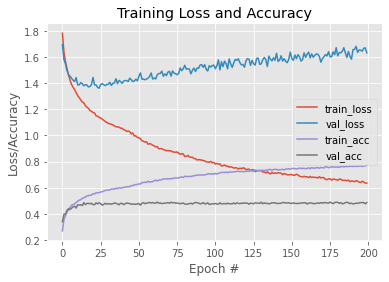

In [14]:
# plot the training loss and accuracy
N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")